In [1]:
import numpy as np 
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import re
import unicodedata
#from wordcloud import WordCloud
from nltk.corpus import stopwords

In [78]:
#IMDB Movie Reviews
#https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data?select=IMDB+Dataset.csv

reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/procesamiento/IMDB Dataset.csv', encoding='latin1')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
reviews['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

## Limpieza

In [79]:
#definimos una funcion que nos ayudara a quitar espacios adicionales, normalizar 
# hacer en minusculas todo el texto, quitar signos 
def limpiar_texto(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [80]:
reviews['texto_limpio'] = reviews['review'].map(limpiar_texto)

## definimos para remover stopwords

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
# definimos para remover stopwords
sw = nltk.corpus.stopwords.words('english')
spw1=sw + ['br', 'br ',' br', ' br ', 'u']

In [83]:
#reviews_2=reviews['texto_limpio']
reviews

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...


In [84]:
#quitamos stopwords
reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spw1)]))


In [85]:
reviews['texto_limpio'][2]
#'br' in spw1


'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

## Tokenización 

In [86]:
#reviews
#Separamos por palabra en cada fila
#reviews['texto_limpio'][1].split() 
#usamos una comprehension list
reviews['texto_limpio']=reviews['texto_limpio'].map(lambda x:x.split(" "))

In [88]:
reviews

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"[going, disagree, previous, comment, side, mal..."


## Lematización

In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
from nltk.stem import WordNetLemmatizer 
import re

In [90]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: lemmatizer(x))
reviews.head()

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


Steaming

In [109]:
ps = PorterStemmer()
def Steamm(text):
    text = [ps.stem(word) for word in text]
    return text

reviews['texto_limpio'] = reviews['texto_limpio'].apply(lambda x: Steamm(x))
reviews.head()

,review,sentiment,texto_limpio
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st..."


## nube de palabras

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import itertools

In [61]:
spw1=sw+['br','br']

In [38]:
Mov_rev=list(itertools.chain.from_iterable(reviews['texto_limpio']))

In [ ]:
Mov_rev=[]
[Mov_rev.extend(reviews['texto_limpio'][i]) for i in range(len(reviews))]

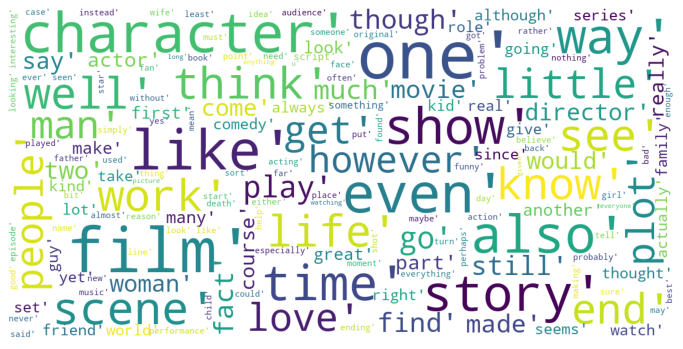

In [97]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=spw1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Mov_rev)

In [102]:
from matplotlib.pyplot import figure

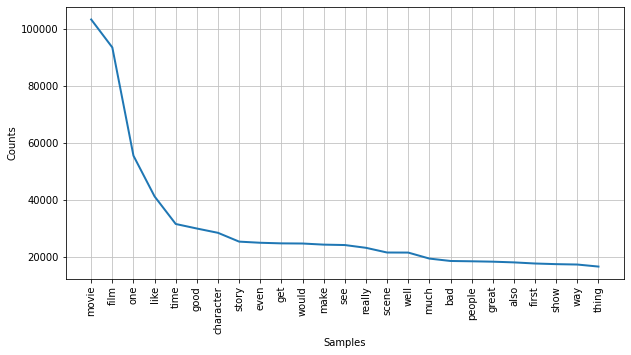

In [103]:
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(Mov_rev)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)